In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [22]:
df=pd.read_csv("AIML Dataset.csv")

In [23]:
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [36]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [25]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [20]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [21]:
df.isnull().sum().sum()

np.int64(0)

In [22]:
df.shape[0]

6362620

In [23]:
round((df["isFraud"].value_counts()[1]/df.shape[0])*100,2)

np.float64(0.13)

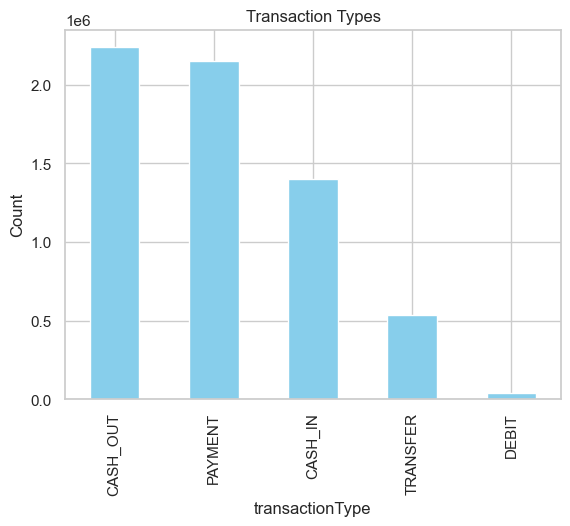

In [24]:
df["type"].value_counts().plot(kind="bar",title="Transaction Types", color="skyblue")
plt.xlabel("transactionType")
plt.ylabel("Count")
plt.show()

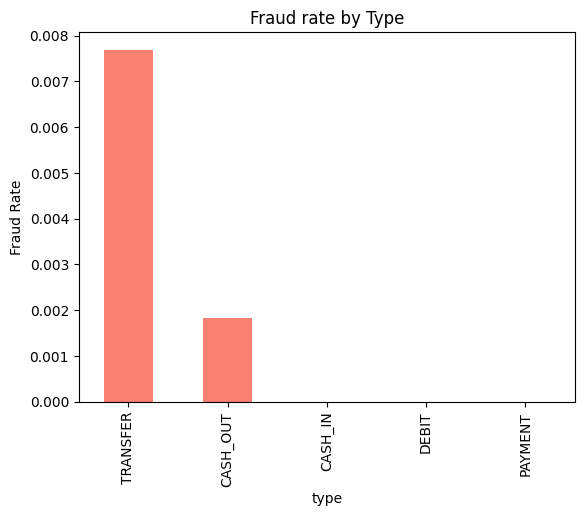

In [8]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar",title="Fraud rate by Type",color="salmon")
plt.ylabel("Fraud Rate")
plt.show()

In [26]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

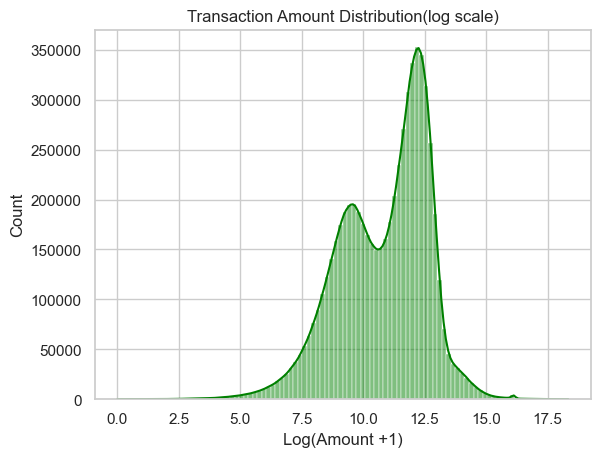

In [61]:
import numpy as np
import seaborn as sns
sns.histplot(np.log1p(df["amount"]),bins=100,kde=True,color="green")
plt.title("Transaction Amount Distribution(log scale)")
plt.xlabel("Log(Amount +1)")
plt.show()


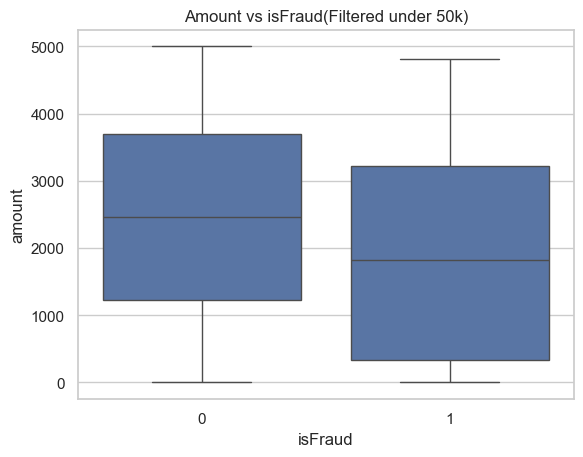

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data= df[df["amount"] < 5000],x ="isFraud",y="amount")
plt.title("Amount vs isFraud(Filtered under 50k)")
plt.show()

In [ ]:
import pandas as pd
df=pd.read_csv("AIML Dataset.csv")
df["balanceDiffOrig"] = df["oldbalanceOrg"]- df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"]- df["oldbalanceDest"]


In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
(df["balanceDiffOrig"]<0).sum()

np.int64(1399253)

In [ ]:
(df["balanceDiffDest"]<0).sum()

np.int64(1238864)

In [ ]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


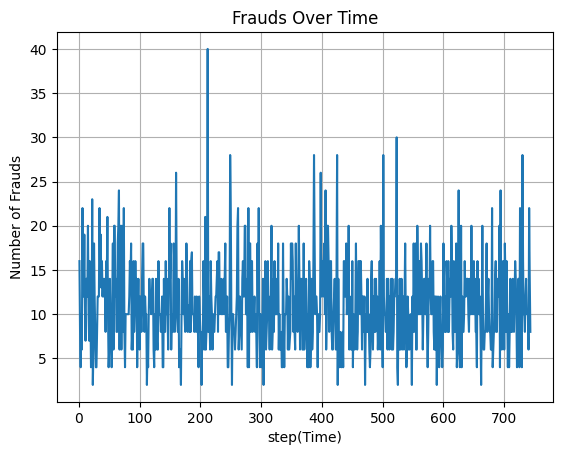

In [7]:
df=pd.read_csv("AIML Dataset.csv")
frauds_per_step= df[df["isFraud"]==1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index ,frauds_per_step.values,label="Frauds per step")
plt.xlabel("step(Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()

In [ ]:
df.drop(columns="step",inplace=True)

In [ ]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [ ]:
top_senders = df["nameOrig"].value_counts().head(10)

In [ ]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [ ]:
top_receivers = df["nameDest"].value_counts().head(10)

In [ ]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [ ]:
fraud_users =df[df["isFraud"]== 1]["nameOrig"].value_counts().head(10)

In [ ]:
fraud_users

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C1118430673    1
C749981943     1
C1334405552    1
C467632528     1
Name: count, dtype: int64

In [ ]:
fraud_types = df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [ ]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

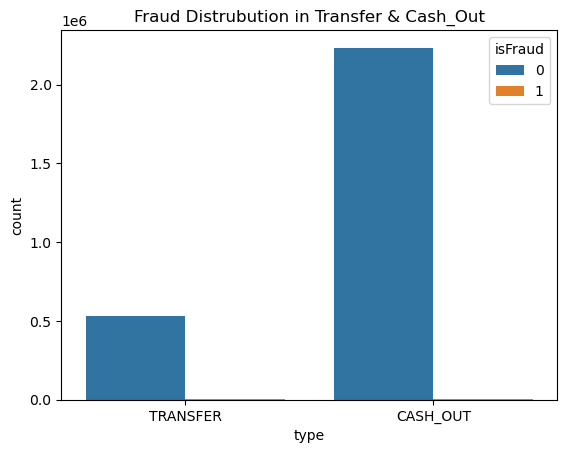

In [ ]:
sns.countplot(data=fraud_types,x="type",hue="isFraud")
plt.title("Fraud Distrubution in Transfer & Cash_Out")
plt.show()

In [11]:
corr =df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()

In [55]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


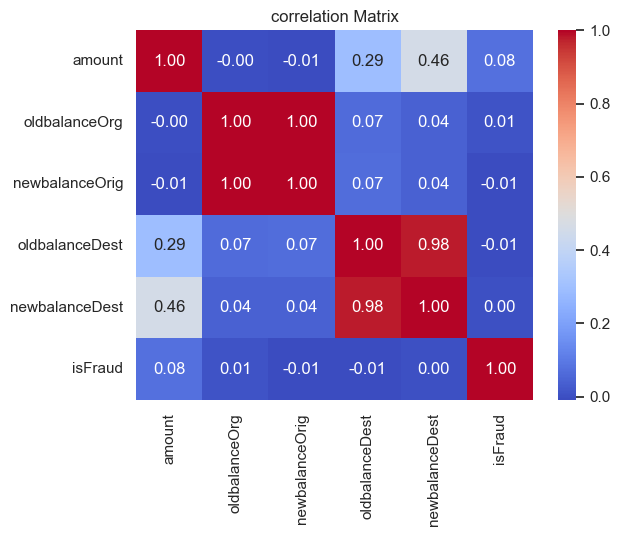

In [63]:
sns.heatmap(corr,annot=True,cmap ="coolwarm",fmt=".2f")
plt.title("correlation Matrix")
plt.show()

In [64]:
zero_after_tansfer = df[
    (df["oldbalanceOrg"] >0) &
    (df["newbalanceOrig"]==0) &
    (df["type"].isin(["TRANSFER","CASH_OUT"]))
]

In [49]:
len(zero_after_tansfer)

1188074

In [50]:
zero_after_tansfer.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [42]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [38]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [36]:
df_model =df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)

In [27]:
df_model =df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)
df_model.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [6]:
categorical=["type"]
numeric=["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [28]:
df_model =df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)
y=df_model["isFraud"]
X=df_model.drop("isFraud",axis= 1)

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)

In [7]:
preprocessor= ColumnTransformer(
    transformers= [
        ("num",StandardScaler(),numeric),
        ("cat",OneHotEncoder(drop="first"), categorical)
    ],
    remainder="drop"
)

In [8]:
Pipeline =Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
]),

In [ ]:
Pipeline.fit(X_train,y_train)

AttributeError: 'tuple' object has no attribute 'fit'

In [10]:
y_pred=Pipeline.predict(X_test)

AttributeError: 'tuple' object has no attribute 'predict'

In [35]:
print(classification_report(y_test,y_pred))

NameError: name 'y_pred' is not defined

In [63]:
confusion_matrix(y_test,y_pred)

NameError: name 'y_pred' is not defined

In [15]:
Pipeline.score(X_test,y_test)*100

NameError: name 'X_test' is not defined

In [14]:
import joblib

joblib.dump(Pipeline,"fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']